# **Endangered and Threatened Species in US National Parks**
### Introduction:
This goal of this project is to analyze a sample of biodiversity data from the National Parks Service, focusing on various species observed in four different national parks: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and Yellowstone National Park. Understanding biodiversity in our public lands can help shape conservation strategy undertaken in the future and can also better justify conservation goals to the public and stakeholders. 

This project will load, scope, clean, analyze, visualize, and seek to explain evident patterns within the data. Data science skills evident in this project are exploratory data analysis, data visualization, data cleaning, regular expressions, and statistical inference. 

### Scope & questions:
The following questions are explored in this project: 

* What is the distribution of conservation status for different categories of species?
* Which of the national parks in question have the most concerning biodiversity status, in terms of extant endangered and threatened species?
* Are there significant differences in conservation statuses for different types of species?
* What animals are most likely to be designated "endangered" or "threatened"? 

### About the data:
Both `Observations.csv` and `Species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com).  `Observations.csv` contains a list of numbers of observations of different species in each of the four national parks in question. `Species.csv` contains more information about the species being observed. 


### Import Python modules:
First, import the python modules that will be used throughout this analysis.

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

%matplotlib inline

### Load data:
In the next steps, `Observations.csv`  and `Species_info.csv` are read in as Pandas `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are previewed with `pd.head()` to check their contents.

#### Species dataframe: 
The `species` DataFrame contains background biological information for each species in the following columns: 
- **category** - The stated category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - Associated common names of each species
- **conservation_status** - The species conservation status

#### Observations dataframe: 
The `observations` DataFrame contains information from recorded sightings of different species throughout the four listed national parks in the past 7 days. The columns in this DataFrame are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [316]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [318]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [320]:
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [410]:
# merge both tables into one DF
species_observations = observations.merge(species, left_on = 'scientific_name', right_on = 'scientific_name')
species_observations.head(20)
print(len(species_observations))

25632


In [324]:
grouped1 = species_observations.groupby(['park_name', 'category']).agg({
    'observations':'sum'
})
grouped1 = grouped1.reset_index()
print(grouped1)

                              park_name           category  observations
0                   Bryce National Park          Amphibian          7542
1                   Bryce National Park               Bird         58590
2                   Bryce National Park               Fish         12823
3                   Bryce National Park             Mammal         28830
4                   Bryce National Park  Nonvascular Plant         32992
5                   Bryce National Park            Reptile          8141
6                   Bryce National Park     Vascular Plant        484373
7   Great Smoky Mountains National Park          Amphibian          5876
8   Great Smoky Mountains National Park               Bird         42869
9   Great Smoky Mountains National Park               Fish          9482
10  Great Smoky Mountains National Park             Mammal         21056
11  Great Smoky Mountains National Park  Nonvascular Plant         24857
12  Great Smoky Mountains National Park            

In [381]:
# Replace NaN values in 'conservation_status' with 'No Intervention'
species_observations['conservation_status'] = species_observations['conservation_status'].fillna('No Intervention')

In [328]:
species_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention


### **Question 1: Distribution of conservation status by species category**
What is the distribution of conservation status for different categories of species? Are certain types of organisms more threatened or endangered than other types of organisms? This section breaks down the dataset into species categories and assesses the frequency of each listing of conservation status for the different categories of species. 

In [331]:
amphibian_obs = species_observations[species_observations['category'] == 'Amphibian']
bird_obs = species_observations[species_observations['category'] == 'Bird']
fish_obs = species_observations[species_observations['category'] == 'Fish']
mammal_obs = species_observations[species_observations['category'] == 'Mammal']
nonvascplant_obs = species_observations[species_observations['category'] == 'Nonvascular Plant']
reptile_obs = species_observations[species_observations['category'] == 'Reptile']
vascplant_obs = species_observations[species_observations['category'] == 'Vascular Plant']

In [333]:
status_df = pd.pivot_table(species_observations,
    index = 'category',
    values = 'scientific_name',
    columns = 'conservation_status',
    aggfunc = 'count'
)

status_df = status_df.fillna(0)
print(status_df)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                   4.0          0.0            300.0   
Bird                       16.0         12.0           2016.0   
Fish                       12.0          0.0            476.0   
Mammal                     44.0         12.0            968.0   
Nonvascular Plant           0.0          0.0           1312.0   
Reptile                     0.0          0.0            304.0   
Vascular Plant              4.0          0.0          19376.0   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                          16.0         8.0  
Bird                              320.0         0.0  
Fish                               16.0        20.0  
Mammal                            168.0         8.0  
Nonvascular Plant                  20.0         0.0  
Reptile                            2

#### A Note on Species with Conservation Status 'No Intervention'
The analysis of conservation status will not include the species classified as "No Intervention". These are species with healthy enough populations and widespread enough ranges to not meet the requirements to be designated "endangered", "threatened" or "species of concern". The number of observations of these species far outnumbers the at-risk species, because it's statistically more likely to observe more abundant species. As an example, see the printout for vascular plants above: the "No Intervention" group of vascular plants numbers nearly 20,000 species, while only 4 observed species are "endangered".  So, the remainder of the Question 1 analysis will exclude unlisted species. 

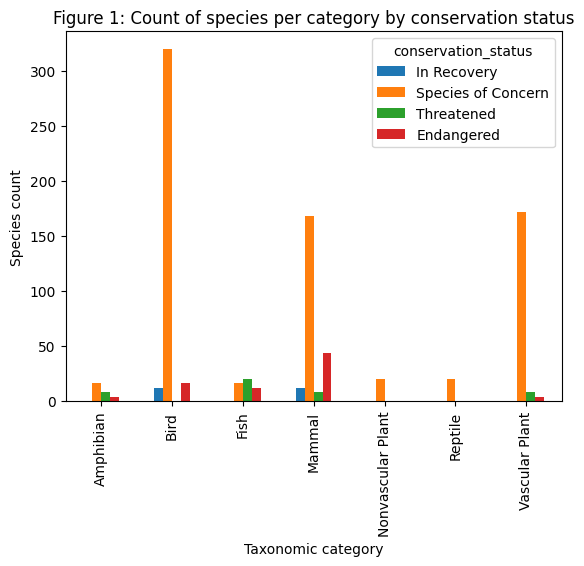

<Figure size 640x480 with 0 Axes>

In [336]:
status_df[['In Recovery','Species of Concern','Threatened', 'Endangered']].plot.bar()
plt.title('Figure 1: Count of species per category by conservation status')
plt.ylabel('Species count')
plt.xlabel('Taxonomic category')
plt.show()
plt.clf()

#### Commentary: Question 1
Based on Figure 1 above, it's clear that most species with a listed conservaiton status are classified as "Species of Concern". This is expected due to the relative ease of meeting the category specifications. The status "Endangered", for comparison, is a much more extreme status in terms of population size and ecological range than "Threatened" or "Species of Concern". 

Focusing solely on "Endangered" (blue bars) and "Threatened" (red bars) species observations in these four national parks, there are far more mammals and birds listed as Endangered than other categories of species. There are no Endangered or Threatened reptiles or nonvascular plants in the whole dataset, and there are far fewer vascular plants and amphibians classified as Endangered than there are mammals or birds classified as Endangered. In contrast, however, there are more fish species listed as Threatened than either mammals or birds. 

It is important to remember that these classifications result from votes by the United States Congress, so some biased preference for terrestrial and charismatic fauna is certainly evident here. That is, it's almost certainly easier to get a group of Congresspersons to vote to protect a well-loved mammal than a widely unknown nonvascular species of algae, for example. This bias is also likely evident in the "In Recovery" category - the majority of species in recovery are also mammals and birds, indicating that there already exist (or have existed) successful conservation measures for species in these categories. 

Of the seven species taxonomic categories, the group that has the fewest species with listed conservation statuses are reptiles and nonvascular plants. The taxonomic categories with the greatest number of at-risk classifications are mammals and birds. 



### **Question 2: ESA listed species in different national parks**
Which of the four national parks included in this study have the lowest and highest observations of species listed and monitored under the US Endangered Species Act? This section considers only species that are declared "Endangered" or "Threatened" under the terms of the E.S.A. First, we'll create a subset of the full observations dataset based on the `conservation_status` column. 

In [340]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [342]:
endangered_subset = species_observations[species_observations.conservation_status == 'Endangered']
threatened_subset = species_observations[species_observations.conservation_status == 'Threatened']

ESA_subset = pd.concat([endangered_subset, threatened_subset])
ESA_subset


,scientific_name,park_name,observations,category,common_names,conservation_status
1400,Picoides borealis,Yosemite National Park,43,Bird,Red-Cockaded Woodpecker,Endangered
1401,Picoides borealis,Great Smoky Mountains National Park,15,Bird,Red-Cockaded Woodpecker,Endangered
1402,Picoides borealis,Yellowstone National Park,64,Bird,Red-Cockaded Woodpecker,Endangered
1403,Picoides borealis,Bryce National Park,24,Bird,Red-Cockaded Woodpecker,Endangered
2476,Rana sierrae,Yosemite National Park,42,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
...,...,...,...,...,...,...
22247,Ursus arctos horribilis,Yellowstone National Park,115,Mammal,Grizzly Bear,Threatened
23020,Noturus flavipinnis,Yosemite National Park,72,Fish,Yellowfin Madtom,Threatened
23021,Noturus flavipinnis,Yellowstone National Park,126,Fish,Yellowfin Madtom,Threatened
23022,Noturus flavipinnis,Great Smoky Mountains National Park,36,Fish,Yellowfin Madtom,Threatened


Text(0.5, 0, 'Park')

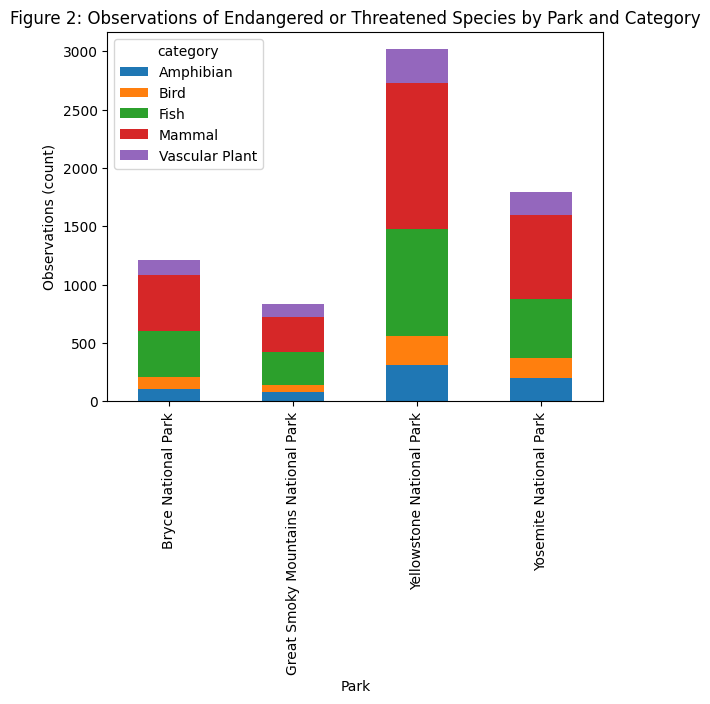

In [344]:
stackedbar_data = pd.pivot_table(ESA_subset,
    index = 'park_name',
    columns = 'category',
    values = 'observations',
    aggfunc = 'sum'
)

stackedbar_data.plot.bar(stacked=True)
plt.title('Figure 2: Observations of Endangered or Threatened Species by Park and Category')
plt.ylabel('Observations (count)')
plt.xlabel('Park')


#### Commentary: Question 2
The national park of these four where the most endangered or threatened species were observed was Yellowstone National Park, and the park with the least observations of endangered or threatened speciews was Great Smoky Mountains National Park. This is likely at least partially due to the sampling bias that results from the larger area and higher visitation rate at Yellowstone relative to the other parks; the larger area means higher populations of wildlife are possible, and the higher visitation rate possibly means recorded observations are more likely to occur. However, under the assumption that all parks were surveyed at the same frequency across the same area, it can be concluded that the ecological diversity of Great Smoky Mountain National Park is lower, potentially more at risk, than the other three national parks in this dataset. 

Another trend evident in Figure 2 above is that the category of species classified as endangered or threatened in the greatest number are mammals. This is true for all four parks under consideration in this dataset. The red portion of the bars in Fig. 2, representing the observations of endangered or threatend mammals, was wider than all other species categories for all four national parks. 

### **Question 3: Significance of differences in conservation status by species category**
Are there significant differences in the conservation statuses for different types of species? This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, including the p-value. The standard p-value to test statistical significance is 0.05. 

In [353]:
# create column masks for whether the species is protected or not
species_observations['is_protected'] = species_observations.conservation_status != 'No Intervention'
species_observations['not_protected'] = ~species_observations.is_protected
species_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,not_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,True


In [357]:
category_counts = species_observations.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [359]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [361]:
from scipy.stats import chi2_contingency

# chi2 test for significant differences in proportion of MAMMALS versus BIRDS that are protected under conservation legislation
contingency_mammals_birds = [[30, 146],
              [75, 413]]
chi2_contingency(contingency_mammals_birds)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [363]:
# chi2 test for significant differences in proportion of AMPHIBIANS versus BIRDS that are protected under conservation legislation
contingency_amphibians_birds = [[7, 72],
                                [75, 413]]
chi2_contingency(contingency_amphibians_birds)

Chi2ContingencyResult(statistic=1.831621580618698, pvalue=0.17593613249594683, dof=1, expected_freq=array([[ 11.42504409,  67.57495591],
       [ 70.57495591, 417.42504409]]))

In [494]:
# chi2 test for significant differences in proportion of AMPHIBIANS versus FISH that are protected under conservation legislation
contingency_amphibians_fish = [[7, 72],
                            [11, 115]]
chi2_contingency(contingency_amphibians_fish)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  6.93658537,  72.06341463],
       [ 11.06341463, 114.93658537]]))

In [369]:
# chi2 test for significant differences in proportion of AMPHIBIANS versus MAMMALS that are protected under conservation legislation
contingency_amphibians_mammals = [[7, 72],
                                [30, 146]]
chi2_contingency(contingency_amphibians_mammals)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 11.4627451,  67.5372549],
       [ 25.5372549, 150.4627451]]))

In [371]:
# chi2 test for significant differences in proportion of AMPHIBIANS versus VASCULAR PLANTS that are protected under conservation legislation
contingency_amphibians_vascplants = [[7, 72],
                                [46, 4216]]
chi2_contingency(contingency_amphibians_vascplants)

Chi2ContingencyResult(statistic=32.7572979770742, pvalue=1.0441355146657018e-08, dof=1, expected_freq=array([[9.64524303e-01, 7.80354757e+01],
       [5.20354757e+01, 4.20996452e+03]]))

In [373]:
# chi2 test for significant differences in proportion of NONVASCULAR PLANTS versus VASCULAR PLANTS that are protected under conservation legislation
contingency_nonvascplants_vascplants = [[5, 328],
                                [46, 4216]]
chi2_contingency(contingency_nonvascplants_vascplants)

Chi2ContingencyResult(statistic=0.19069121233812064, pvalue=0.6623419491381985, dof=1, expected_freq=array([[3.69597388e+00, 3.29304026e+02],
       [4.73040261e+01, 4.21469597e+03]]))

In [375]:
# chi2 test for significant differences in proportion of BIRDS versus VASCULAR PLANTS that are protected under conservation legislation
contingency_birds_vascplants = [[75, 413],
                                [46, 4216]]
chi2_contingency(contingency_birds_vascplants)

Chi2ContingencyResult(statistic=354.42332680820607, pvalue=4.612268031690143e-79, dof=1, expected_freq=array([[  12.43115789,  475.56884211],
       [ 108.56884211, 4153.43115789]]))

In [377]:
# chi2 test for significant differences in proportion of REPTILES versus MAMMALS that are protected under conservation legislation
contingency_reptile_mammal = [[5, 73],
                                [30, 146]]
chi2_contingency(contingency_reptile_mammal)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))

In [379]:
# chi2 test for significant differences in proportion of REPTILES versus BIRDS that are protected under conservation legislation
contingency_reptile_bird = [[5, 73],
                                [75, 413]]
chi2_contingency(contingency_reptile_bird)

Chi2ContingencyResult(statistic=3.739654778685496, pvalue=0.053135422321542065, dof=1, expected_freq=array([[ 11.02473498,  66.97526502],
       [ 68.97526502, 419.02473498]]))

In [484]:
# chi2 test for significant differences in proportion of MAMMALS versus FISH that are protected under conservation legislation
contingency_mammals_fish = [[30, 146],
                                [11, 115]]
chi2_contingency(contingency_mammals_fish)

Chi2ContingencyResult(statistic=3.647651024981415, pvalue=0.0561483484489001, dof=1, expected_freq=array([[ 23.89403974, 152.10596026],
       [ 17.10596026, 108.89403974]]))

#### Commentary: Question 3
The Chi-squared contingency table analysis shows that many pairs of species categories are not significantly different in their protected versus unprotected status. A significance level of pvalue less than 0.05 was applied in all comparisons. Overall, both `Vascular Plants` and `Nonvascular Plants` differ significantly in their proportion of protected species relative to all the animal species categories. Plant species are more likely to be observed in the parks (observations and unique species counts are higher, see Figures 1 and 2 above) but less likely to enjoy protected conservation status than the animal species groups considered in this dataset. 

Comparing animal groups to each other creates a more complicated picture. The pairwise comparisons that were significantly different in protected status were `Reptiles` and `Mammals`, with `Mammals` having a greater proportion of their observed species with protected status relative to `Reptiles` (p-value = 0.038). However, the proportions of protected species between `Mammals` and `Birds`, `Amphibians`, and `Fish`, respectively, are not significantly different at the p = 0.05 significance level (though at a less-conservative significance level, 0.1 perhaps, then significant differences are observed between `Mammals` and `Fish` and between `Reptiles` and `Birds`). Other pairings of animal categories do not evince significant differences in their proportions of protected versus unprotected species. Overall, this suggests that a mammal species may be slightly more likely than other animals to be granted conservation protections, but that more data from more parks and over a longer time frame is necessary to confirm or reject this claim. While increased rate of conservation interventions for mammals aligns with the common understanding of human affinity for mammals over other animal groups, this dataset does not comprehensively support this claim. 

### **Question 4: Which animal(s) is(are) most likely to be listed with a conservation status?**
Are there certain animal species / groups of species that are listed under conservation statutes more than others?  Which kinds of animals are more likely to be granted conservation protections or conservation interventions than others? This section uses Regular Expressions to assess which species common name descriptors show up the most often in the series `common_names` within the DataFrame. 

In [456]:
#create DataFrame with only the animal categories
animal_observations = species_observations[species_observations['category'] != 'Nonvascular Plant']
animal_observations = animal_observations[animal_observations['category'] != 'Vascular Plant']
animal_observations = animal_observations[animal_observations['conservation_status'] != 'No Intervention']

# since each species has 4 rows (one row per observations for each of 4 parks), 
# just consider one park so as to avoid duplicate counting of common names
# animal_observations = animal_observations[animal_observations['park_name'] == 'Yellowstone National Park']
print(len(animal_observations))
print(animal_observations['category'].unique())

4740
['Mammal' 'Bird' 'Amphibian' 'Reptile' 'Fish']


In [472]:
unique_common_names = animal_observations['common_names'].unique()
unique_common_names = pd.Series(unique_common_names)
print(unique_common_names.iat[5])

Northern Short Tailed Shrew, Northern Short-Tailed Shrew


In [500]:
import re

common_names_list = []
for i in range(len(unique_common_names)):
    tempstring = unique_common_names.iat[i]
    no_punc_string = re.sub(r'[^\w\s]', '', tempstring)
    lower_string = no_punc_string.lower()
    words = str.split(lower_string)
    common_names_list.append(words)

print(common_names_list)
    

[['american', 'mink'], ['field', 'sparrow'], ['sedge', 'wren'], ['bonapartes', 'gull'], ['eastern', 'spadefoot'], ['northern', 'short', 'tailed', 'shrew', 'northern', 'shorttailed', 'shrew'], ['whitetailed', 'deer'], ['whitetailed', 'deer', 'whitetailed', 'deer'], ['common', 'garter', 'snake'], ['panther', 'mountain', 'lion'], ['cougar', 'mountain', 'lion', 'puma'], ['mountain', 'lion'], ['northern', 'hog', 'sucker'], ['coopers', 'hawk'], ['longtail', 'salamander'], ['brewers', 'blackbird'], ['lapland', 'longspur'], ['ovenbird'], ['boreal', 'chorus', 'frog'], ['goldencrowned', 'sparrow'], ['redheaded', 'woodpecker'], ['orangecrowned', 'warbler'], ['stellers', 'jay'], ['american', 'goldfinch'], ['rainbow', 'trout'], ['blackbilled', 'magpie', 'magpie'], ['blackbilled', 'magpie'], ['european', 'starling'], ['common', 'starling', 'european', 'starling'], ['ermine', 'short', 'tailed', 'weasel'], ['ermine'], ['osprey'], ['osprey', 'western', 'osprey'], ['wood', 'duck'], ['prairie', 'rattlesn

In [476]:
from itertools import chain

flat_name_words_list = list(chain.from_iterable(common_names_list))
print(flat_name_words_list[0:100])

['american', 'mink', 'field', 'sparrow', 'sedge', 'wren', 'bonapartes', 'gull', 'eastern', 'spadefoot', 'northern', 'short', 'tailed', 'shrew', 'northern', 'shorttailed', 'shrew', 'whitetailed', 'deer', 'whitetailed', 'deer', 'whitetailed', 'deer', 'common', 'garter', 'snake', 'panther', 'mountain', 'lion', 'cougar', 'mountain', 'lion', 'puma', 'mountain', 'lion', 'northern', 'hog', 'sucker', 'coopers', 'hawk', 'longtail', 'salamander', 'brewers', 'blackbird', 'lapland', 'longspur', 'ovenbird', 'boreal', 'chorus', 'frog', 'goldencrowned', 'sparrow', 'redheaded', 'woodpecker', 'orangecrowned', 'warbler', 'stellers', 'jay', 'american', 'goldfinch', 'rainbow', 'trout', 'blackbilled', 'magpie', 'magpie', 'blackbilled', 'magpie', 'european', 'starling', 'common', 'starling', 'european', 'starling', 'ermine', 'short', 'tailed', 'weasel', 'ermine', 'osprey', 'osprey', 'western', 'osprey', 'wood', 'duck', 'prairie', 'rattlesnake', 'pacificslope', 'flycatcher', 'walleye', 'sauger', 'bank', 'swa

In [498]:
from collections import Counter

name_word_counter = Counter(flat_name_words_list)
most_occur = name_word_counter.most_common(15) 
  
print(most_occur) 

[('northern', 56), ('salamander', 46), ('eastern', 40), ('warbler', 40), ('american', 36), ('western', 35), ('bat', 35), ('common', 31), ('sparrow', 30), ('snake', 29), ('shrew', 28), ('myotis', 26), ('mountain', 24), ('darter', 21), ('gray', 20)]


#### Commentary: Question 4
The single type of animal that is present most often in the subset of species with listed protected status is the salamander, followed closely by warblers and then bats. It is ecologically sensible that salamanders experienced decreased populations and limited range more urgently than other animal species; due to their porous skin and constant absorption of air and water through those pores, salamanders are an indicator species for air and water quality. This means salamanders are particularly sensitive to the presence of toxins in their habitat, which are readily absorbed through the skin, and so salamanders (and other amphibians) tend to respond as a population more quickly to changes in environmental quality than other species populations. 